# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

# Data Automation
We are now implementing the data automation within our Churn Data. We will be using PyCaret today.

### Disclaimer

This was done beforehand in the conda terminal to account for the correct Python version (3.10) for PyCaret to run.

##### This created the correct conda environment
conda create --name <PyCaret310> anaconda python=3.10

##### Activating my conda environment
conda activate <PyCaret310>

##### Installing pycaret
pip install pycaret

##### Creating the Kernel
python -m ipykernel install --user --name <yourenvname> --display-name "<display-name-for yourenvname>"

First let's import the needed packages.

In [1]:
import pandas as pd

#Importing the data set and confirming it is the correct data set
df = pd.read_csv('Data/churn_data3.csv')
df.head(10)

,Unnamed: 0,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,2,29.85,29.85,1
1,1,34,1,1,3,56.95,1889.50,1
2,2,2,1,0,3,53.85,108.15,0
3,3,45,0,1,1,42.30,1840.75,1
4,4,2,1,0,2,70.70,151.65,0
5,5,8,1,0,2,99.65,820.50,0
6,6,22,1,0,0,89.10,1949.40,1
7,7,10,0,0,3,29.75,301.90,1
8,8,28,1,0,2,104.80,3046.05,0
9,9,62,1,1,1,56.15,3487.95,1


In [2]:
#I'm running into the "Unnamed:0" issue. Let's remove this data.
df.columns = df.columns.str.strip()
df = df.drop(df.columns[0], axis = 1)

#Confirming it worked
df.head(10)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,2,29.85,29.85,1
1,34,1,1,3,56.95,1889.50,1
2,2,1,0,3,53.85,108.15,0
3,45,0,1,1,42.30,1840.75,1
4,2,1,0,2,70.70,151.65,0
5,8,1,0,2,99.65,820.50,0
6,22,1,0,0,89.10,1949.40,1
7,10,0,0,3,29.75,301.90,1
8,28,1,0,2,104.80,3046.05,0
9,62,1,1,1,56.15,3487.95,1


In [6]:
#Importing the needed PyCaret packages
from pycaret.classification import ClassificationExperiment #setup, compare_models, predict_model, save_model, load_model

In [7]:
#Setting up the neded model
automl = ClassificationExperiment() #setup(df, target='Diabetes')

In [8]:
#Now we run the model to make sure everything is running smoothly
automl.setup(df, target='Churn')

,Description,Value
0,Session id,3035
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 7)"
4,Transformed data shape,"(7043, 7)"
5,Transformed train set shape,"(4930, 7)"
6,Transformed test set shape,"(2113, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


### Now let's figure out which Model is best for this data set
We will run the model to figure out which actual model will run the most effectively for the data that we have.

In [9]:
#Comarping all the availavle models via scoring
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7959,0.8312,0.9001,0.8354,0.8664,0.4367,0.4428,2.2280
ada,Ada Boost Classifier,0.7947,0.8339,0.8962,0.8365,0.8652,0.4369,0.4421,0.1840
gbc,Gradient Boosting Classifier,0.7947,0.8342,0.9050,0.8310,0.8663,0.4275,0.4353,0.4210
ridge,Ridge Classifier,0.7929,0.8168,0.9180,0.8214,0.8669,0.4063,0.4196,0.0220
lda,Linear Discriminant Analysis,0.7870,0.8168,0.8940,0.8297,0.8605,0.4126,0.4180,0.0310
lightgbm,Light Gradient Boosting Machine,0.7856,0.8236,0.8882,0.8318,0.8589,0.4139,0.4183,0.3260
rf,Random Forest Classifier,0.7748,0.7969,0.8752,0.8282,0.8509,0.3919,0.3953,0.3360
knn,K Neighbors Classifier,0.7669,0.7431,0.8854,0.8138,0.8481,0.3515,0.3575,0.0460
et,Extra Trees Classifier,0.7611,0.7689,0.8575,0.8244,0.8405,0.3644,0.3661,0.3170
qda,Quadratic Discriminant Analysis,0.7487,0.8247,0.7548,0.8866,0.8151,0.4300,0.4443,0.0260


Based on the accuracy scores, the best_model now is holding on to the highest scoring model. In this case, it is the Logistic Regression Model.

In [11]:
#Let's confrim the highest scoring model was logistic regression
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3035, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Now let's break down the model even further by graphing the True Positve vs False Postive Rates between the other models

In [13]:
#Reviewing the Potential Plots we can use
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

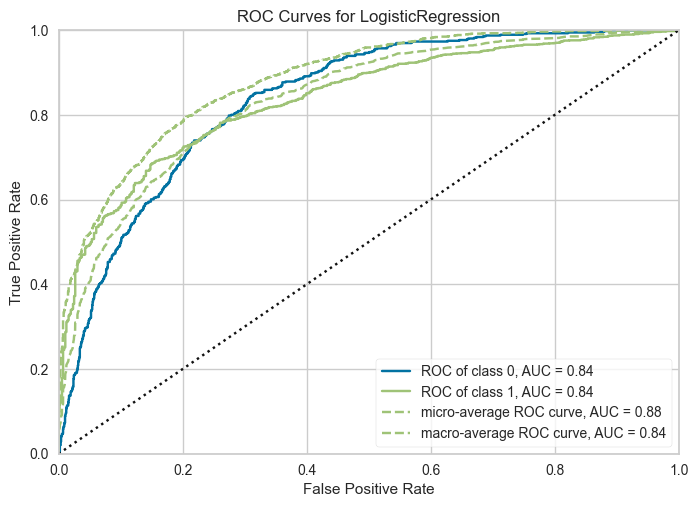

In [15]:
#Reviewing the other models compared to the best one we found
automl.plot_model(best_model)

We can see that the tests were very similair with the Logistic Regression test being the most effective.

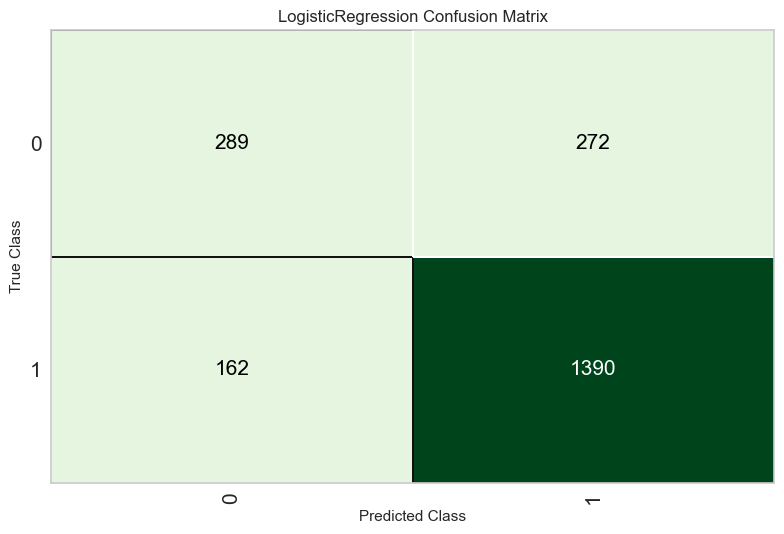

In [16]:
#We will now confirm with the confusion matrix the differences between false/true postives/negatives
automl.plot_model(best_model, plot = 'confusion_matrix')

The confusion matrix confrims that it is best at predicting True Negatives, but struggles with True/False Positives. Let's now progress to predictions with our new model.

#### Predicting
Let's use our model to predict a line of data

In [18]:
#Using our 'Best Model' to predict one line of data
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,1.0000,0,0.0000,0.0000,0.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
7041,4,1,0,3,74.400002,306.600006,0,0,0.6037


When we cleaned up our data, we assigned the yes value to 0 and no to 1 for 'churn'. This line predicted the customer not to churn under these condition with a 60% confidence rate. Let's now predict the whold data set and see how it runs.

In [20]:
#Predicting the whole data set
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.7954,0.8334,0.8995,0.8348,0.8659,0.4366,0.4421


In [21]:
#Let's look at 5 examples of predictions in this data set 
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
0,1,0,0,2,29.850000,29.850000,1,0,0.5148
1,34,1,1,3,56.950001,1889.500000,1,1,0.9159
2,2,1,0,3,53.849998,108.150002,0,1,0.5294
3,45,0,1,1,42.299999,1840.750000,1,1,0.9358
4,2,1,0,2,70.699997,151.649994,0,0,0.5749


We will make these predictions stronger in the future, but the prediction scores of below 55% are very concerning for this model.

### Creating the background code for predictions
We will now tune the model to properly predict churn rates.

In [22]:
#Saving as a Pickle file to edit in 
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',...
                                                               fill_value=None,
                        

In [51]:
#Reviewing the code within the model we created

#I had to rewrite some of the code to fit the data provided (for example, not include 'churn' as a column)
from IPython.display import Code

Code('Test.py')

import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath)
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, data=df)
    predictions.rename(columns={'prediction_label': 'churn'}, inplace=True)
    predictions['churn'].replace({1: 'Yes', 0: 'No'}, inplace=True)
    return predictions['churn']


if __name__ == "__main__":
    df = load_data('Data/new_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

### Testing out the model on a new data set
We will now check to see if this model will work on a data set that was not used in the original set.

In [50]:
#Let's look at what we're predicting
df3 = pd.read_csv('Data/new_churn_data.csv')
df3.head()

,customerID,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure
0,9305-CKSKC,22,1,0,2,97.40,811.70,36.895455
1,1452-KNGVK,8,0,1,1,77.30,1701.95,212.743750
2,6723-OKKJM,28,1,0,0,28.25,250.90,8.960714
3,7832-POPKP,62,1,0,2,101.70,3106.56,50.105806
4,6348-TACGU,10,0,0,1,51.15,3440.97,344.097000


In [49]:
%run Test.py

Transformation Pipeline and Model Successfully Loaded
predictions:
0     No
1     No
2    Yes
3    Yes
4     No
Name: churn, dtype: object


In [23]:
#Let's Import the Model to ensure it still works
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


# Summary

I still have the issue where my predictions are less than 70%, which is frustrating, but I'm excited to see the model I create effectively work. The PyCaret method is a great way to narrow down which model we should be using. It also provides multiple models that I would have never heard about. I think the best part about this lesson was our ability to input an entirely new data set and predict the churn rate for each line.